In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')

from network_tools import create_network, create_encoders, run_network, reset_network, find_steady_state, run_network_early_exit
from iris_data_tools import read_iris_data, normalize_iris_data
from plotting_tools import plot_spikes, plot_fire_matrix, plot_steady_state

iris_data_location = '../Data/Iris/iris.data'

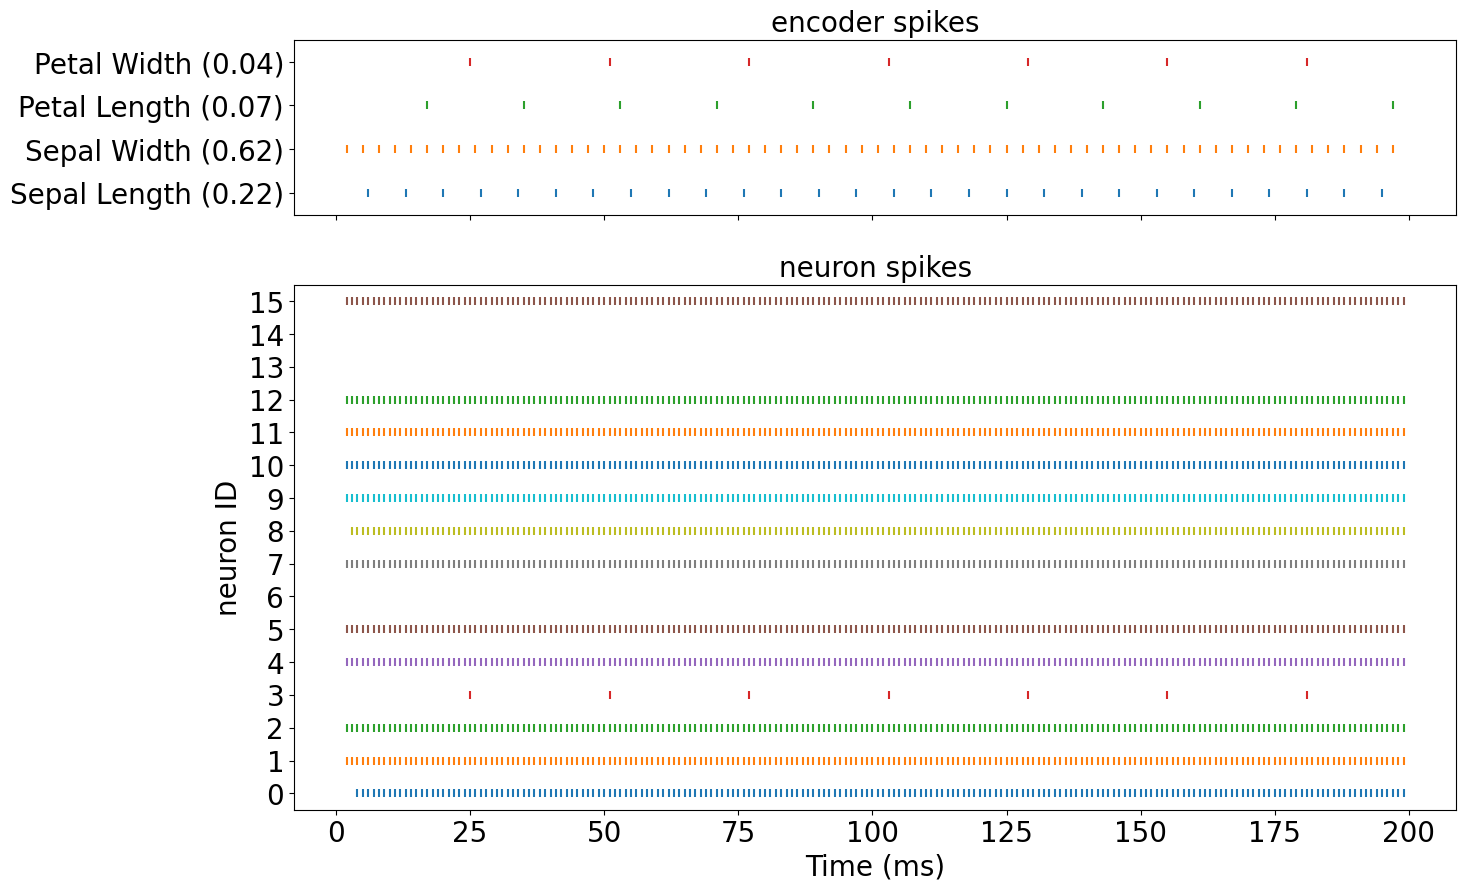

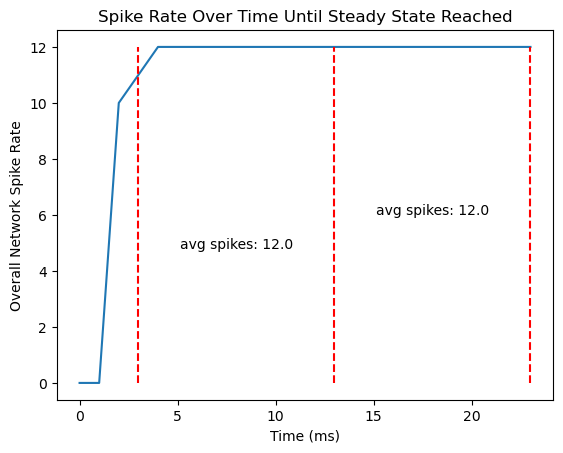

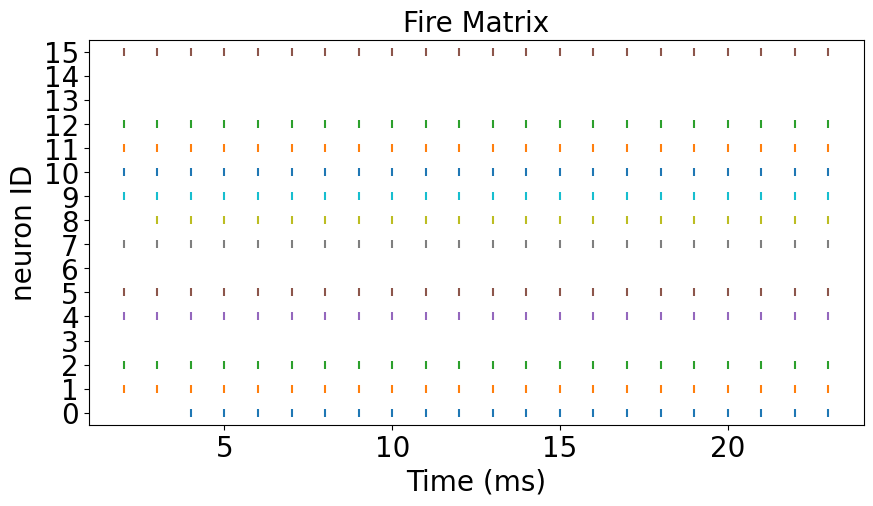

avg neuron fire rates (x):
neruon 15: 0.9166666666666666
neruon 14: 0.0
neruon 13: 0.0
neruon 12: 0.9166666666666666
neruon 11: 0.9166666666666666
neruon 10: 0.9166666666666666
neruon 9: 0.9166666666666666
neruon 8: 0.875
neruon 7: 0.9166666666666666
neruon 6: 0.0
neruon 5: 0.9166666666666666
neruon 4: 0.9166666666666666
neruon 3: 0.0
neruon 2: 0.9166666666666666
neruon 1: 0.9166666666666666
neruon 0: 0.8333333333333334


In [2]:
iris_data, labels, classes, attributes = read_iris_data(iris_data_location)

normalized_iris_data = normalize_iris_data(iris_data, attributes)
# create a test network and encoders
n_neurons = 16
n_synapses = int(n_neurons * np.random.uniform(low=2, high=3)) # random number from n_neurons * 2 to n_neurons * 3

neurons = create_network(n_neurons, n_synapses)

encoders = create_encoders(attributes)

sim_time = 200
# feed a test sample into the test network and run it
fires = run_network(neurons, encoders, normalized_iris_data[0], sim_time)

reset_network(neurons, encoders)

plot_spikes(fires, attributes, normalized_iris_data[0], sim_time)

window_size = 10
fire_matrix, total_fires, steady_state_t, (m1, m2) = find_steady_state(sim_time, attributes, fires, window_size=window_size)

if steady_state_t == 0:
    steady_state_t = sim_time

plot_steady_state(steady_state_t, total_fires, window_size, m1, m2)

# test early exit
fire_matrix = run_network_early_exit(neurons, encoders, normalized_iris_data[0], sim_time, window_size=window_size)

reset_network(neurons, encoders)

plot_fire_matrix(fire_matrix)